Category: n02099601


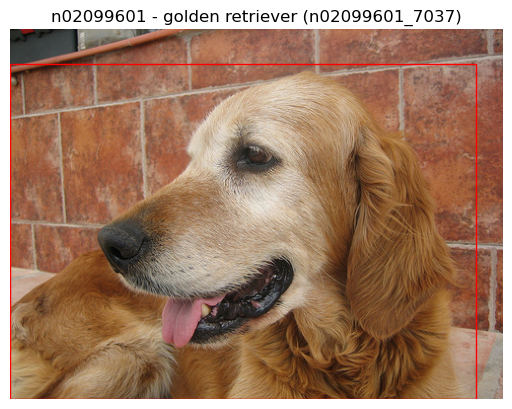

Overlap percentage between n02099601_7037 and n02099601_9518: 51.32%
  - Bbox 1: (0, 35, 472, 374)
  - Bbox 2: (25, 42, 331, 498)
  - Overlap Area: 101592
  - Area Bbox 1: 160008
  - Area Bbox 2: 139536



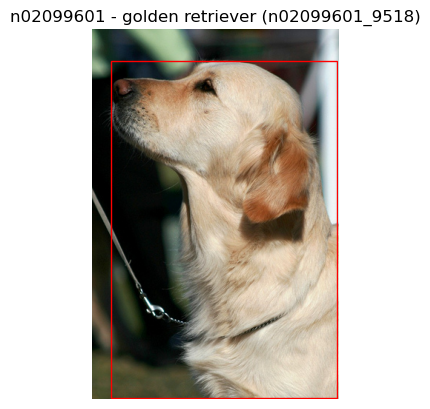

Average overlap percentage in category n02099601: 51.32%

Category: n02326432


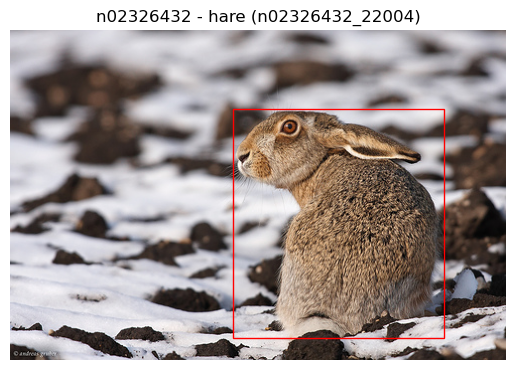

Overlap percentage between n02326432_22004 and n02326432_991: 57.52%
  - Bbox 1: (224, 79, 437, 310)
  - Bbox 2: (197, 20, 402, 296)
  - Overlap Area: 38626
  - Area Bbox 1: 49203
  - Area Bbox 2: 56580

Overlap percentage between n02326432_22004 and n02326432_14043: 38.90%
  - Bbox 1: (224, 79, 437, 310)
  - Bbox 2: (30, 25, 426, 296)
  - Overlap Area: 43834
  - Area Bbox 1: 49203
  - Area Bbox 2: 107316



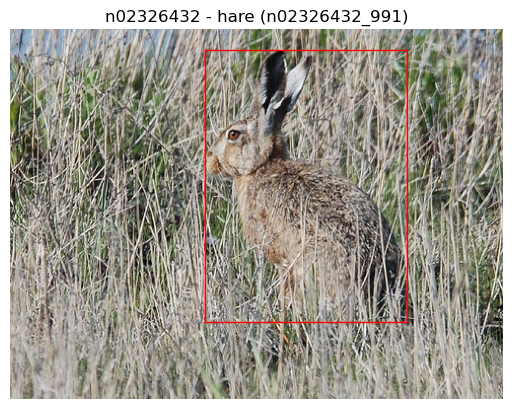

Overlap percentage between n02326432_991 and n02326432_14043: 51.28%
  - Bbox 1: (197, 20, 402, 296)
  - Bbox 2: (30, 25, 426, 296)
  - Overlap Area: 55555
  - Area Bbox 1: 56580
  - Area Bbox 2: 107316



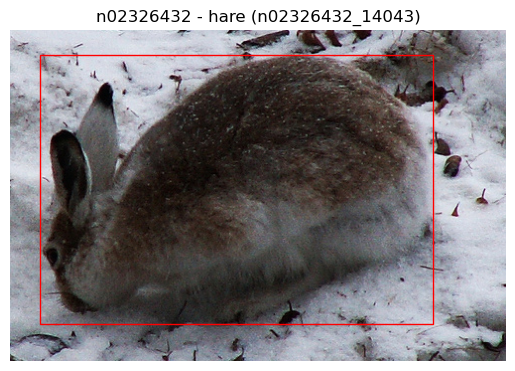

Average overlap percentage in category n02326432: 49.23%

Category: n02397096


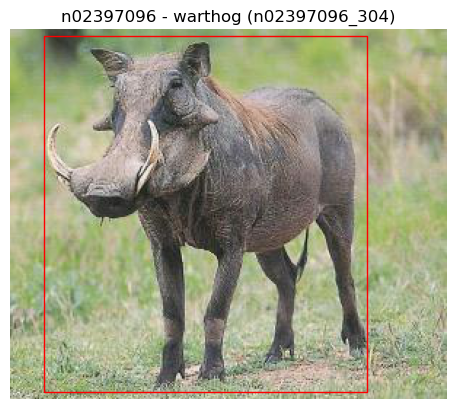

Overlap percentage between n02397096_304 and n02397096_2951: 9.07%
  - Bbox 1: (23, 4, 245, 249)
  - Bbox 2: (173, 161, 415, 251)
  - Overlap Area: 6336
  - Area Bbox 1: 54390
  - Area Bbox 2: 21780

Overlap percentage between n02397096_304 and n02397096_5284: 26.52%
  - Bbox 1: (23, 4, 245, 249)
  - Bbox 2: (23, 167, 260, 304)
  - Overlap Area: 18204
  - Area Bbox 1: 54390
  - Area Bbox 2: 32469

Overlap percentage between n02397096_304 and n02397096_8701: 36.51%
  - Bbox 1: (23, 4, 245, 249)
  - Bbox 2: (41, 11, 484, 298)
  - Overlap Area: 48552
  - Area Bbox 1: 54390
  - Area Bbox 2: 127141



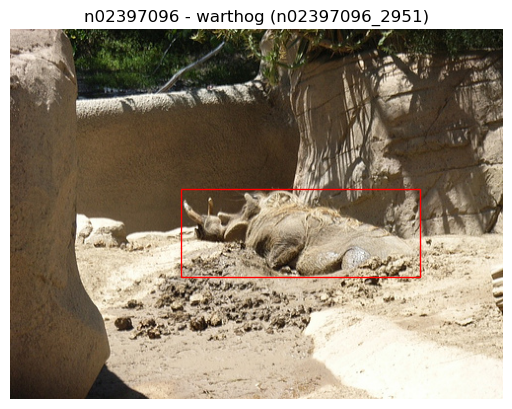

Overlap percentage between n02397096_2951 and n02397096_5284: 15.57%
  - Bbox 1: (173, 161, 415, 251)
  - Bbox 2: (23, 167, 260, 304)
  - Overlap Area: 7308
  - Area Bbox 1: 21780
  - Area Bbox 2: 32469

Overlap percentage between n02397096_2951 and n02397096_8701: 17.13%
  - Bbox 1: (173, 161, 415, 251)
  - Bbox 2: (41, 11, 484, 298)
  - Overlap Area: 21780
  - Area Bbox 1: 21780
  - Area Bbox 2: 127141



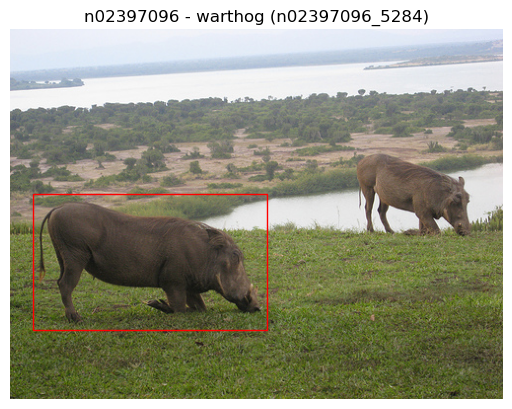

Overlap percentage between n02397096_5284 and n02397096_8701: 21.91%
  - Bbox 1: (23, 167, 260, 304)
  - Bbox 2: (41, 11, 484, 298)
  - Overlap Area: 28689
  - Area Bbox 1: 32469
  - Area Bbox 2: 127141



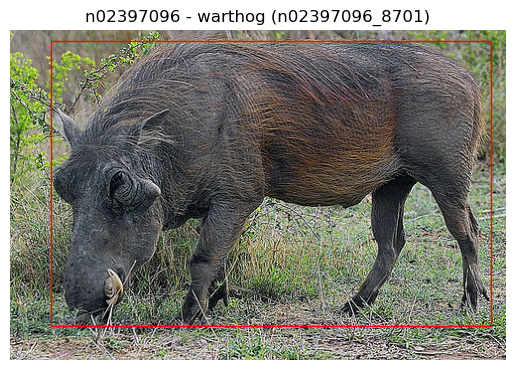

Average overlap percentage in category n02397096: 21.12%



In [39]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Function to parse XML annotation files
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    # Extract class label
    obj = root.find('object')
    class_label = obj.find('name').text
    
    # Extract bounding box coordinates
    bbox = obj.find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)
    
    return class_label, (xmin, ymin, xmax, ymax)

# Function to plot image with bounding box
def plot_image_with_bbox(image_path, class_label, bbox, image_name):
    # Load image
    image = plt.imread(image_path)
    
    # Create figure and axes
    fig, ax = plt.subplots(1)
    
    # Display the image
    ax.imshow(image)
    
    # Create a Rectangle patch
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    
    # Add class label and image name as title
    ax.set_title(f"{class_label} - {class_labels[class_label]} ({image_name})")
    
    # Remove axis
    ax.axis('off')
    
    plt.show()

# Function to calculate bounding box overlap percentage
def bbox_overlap(bbox1, bbox2, image_name1, image_name2):
    # Calculate overlap area
    x_overlap = max(0, min(bbox1[2], bbox2[2]) - max(bbox1[0], bbox2[0]))
    y_overlap = max(0, min(bbox1[3], bbox2[3]) - max(bbox1[1], bbox2[1]))
    overlap_area = x_overlap * y_overlap
    
    # Calculate areas of both bounding boxes
    area_bbox1 = (bbox1[2] - bbox1[0]) * (bbox1[3] - bbox1[1])
    area_bbox2 = (bbox2[2] - bbox2[0]) * (bbox2[3] - bbox2[1])
    
    # If there's no overlap, return 0
    if overlap_area == 0:
        return 0
    
    # Calculate overlap percentage
    overlap_percentage = overlap_area / (area_bbox1 + area_bbox2 - overlap_area) * 100
    
    # Print the calculated values
    print(f"Overlap percentage between {image_name1} and {image_name2}: {overlap_percentage:.2f}%")
    print(f"  - Bbox 1: {bbox1}")
    print(f"  - Bbox 2: {bbox2}")
    print(f"  - Overlap Area: {overlap_area}")
    print(f"  - Area Bbox 1: {area_bbox1}")
    print(f"  - Area Bbox 2: {area_bbox2}")
    print()
    
    return overlap_percentage if overlap_percentage is not None else 0

# Path to dataset and annotation folders
dataset_folder = "dataset"
annotation_folder = "Annotation"

# List of categories
categories = ["n02099601", "n02326432", "n02397096"]

# Mapping of class IDs to labels
class_labels = {
    "n02099601": "golden retriever",
    "n02326432": "hare",
    "n02397096": "warthog"
}

# Select randomly 10 images from each category
selected_images = {}
for category in categories:
    image_files = os.listdir(os.path.join(dataset_folder, category))
    selected_images[category] = random.sample(image_files, min(10, len(image_files)))

# Plot images with bounding boxes and calculate overlap percentage
for category in categories:
    print(f"Category: {category}")
    overlap_percentages = []
    for i, image_file1 in enumerate(selected_images[category]):
        image_name1, _ = os.path.splitext(image_file1)
        xml_file1 = os.path.join(annotation_folder, category, image_name1 + ".xml")
        if not os.path.exists(xml_file1):
            continue
        class_label1, bbox1 = parse_annotation(xml_file1)
        image_path1 = os.path.join(dataset_folder, category, image_file1)
        plot_image_with_bbox(image_path1, class_label1, bbox1, image_name1)
        
        # Calculate overlap percentage for the current image with others in the category
        for j, image_file2 in enumerate(selected_images[category]):
            if j <= i:
                continue
            image_name2, _ = os.path.splitext(image_file2)
            xml_file2 = os.path.join(annotation_folder, category, image_name2 + ".xml")
            if not os.path.exists(xml_file2):
                continue
            class_label2, bbox2 = parse_annotation(xml_file2)
            overlap_percent = bbox_overlap(bbox1, bbox2, image_name1, image_name2)
            overlap_percentages.append(overlap_percent)
    if overlap_percentages:
        average_overlap = sum(overlap_percentages) / len(overlap_percentages)
        print(f"Average overlap percentage in category {category}: {average_overlap:.2f}%")
    else:
        print("No overlap percentages calculated in this category.")
    print()
